<a href="https://colab.research.google.com/github/Nirupama-b/OralDisease_Classification/blob/main/OralDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [8]:
!unzip /content/oral-diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4772.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4773.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4776.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4782.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4803.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4807.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4808.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_481.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4812.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mout

# Downloaded dataset from kaggle

In [9]:
!kaggle datasets download -d salmansajid05/oral-diseases

Dataset URL: https://www.kaggle.com/datasets/salmansajid05/oral-diseases
License(s): unknown
oral-diseases.zip: Skipping, found more recently modified local copy (use --force to force download)


# Created new file called "dataset" where i moved necessary files

In [10]:

import os
import shutil

# Specify the paths of the folders to be moved
folder1_path = '/content/Calculus/Calculus'
folder2_path = '/content/Data caries/Data caries/caries augmented data set/preview'
folder3_path='/content/Gingivitis/Gingivitis'
folder4_path='/content/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview'
folder5_path='/content/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview'
folder6_path='/content/hypodontia/hypodontia'


# Specify the destination directory (dataset) path
destination_path = '/content/dataset'




# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)
    print(f"Directory '{destination_path}' created successfully.")



# Moved folder1 to the dataset directory
shutil.move(folder1_path, destination_path)
print(f"Folder '{folder1_path}' moved to '{destination_path}'.")

# Moved folder2 to the dataset directory
shutil.move(folder2_path, destination_path)
print(f"Folder '{folder2_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'data_caries'))

# Moved folder3 to the dataset directory
shutil.move(folder3_path, destination_path)
print(f"Folder '{folder3_path}' moved to '{destination_path}'.")

# Moved folder4 to the dataset directory
shutil.move(folder4_path, destination_path)
print(f"Folder '{folder4_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'Mouth Ulcer'))


# Moved folder5 to the dataset directory
shutil.move(folder5_path, destination_path)
print(f"Folder '{folder5_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'Tooth Discoloration'))

# Moved folder6 to the dataset directory
shutil.move(folder6_path, destination_path)
print(f"Folder '{folder6_path}' moved to '{destination_path}'.")



Folder '/content/Calculus/Calculus' moved to '/content/dataset'.
Folder '/content/Data caries/Data caries/caries augmented data set/preview' moved to '/content/dataset'.
Folder '/content/Gingivitis/Gingivitis' moved to '/content/dataset'.
Folder '/content/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview' moved to '/content/dataset'.
Folder '/content/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview' moved to '/content/dataset'.
Folder '/content/hypodontia/hypodontia' moved to '/content/dataset'.


\# We are creating two sub folders training(80%) and testing(20%) in dataset file

In [11]:
#This code to create train and test folders which 80%=>training,20%=>testing

import os
import random
import shutil
# Set the path to your dataset
base_dir = '/content/dataset'

# Create training and testing directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set the percentage of data for training (70%) and testing (30%)
train_percentage = 0.8

# Iterate through each class folder
classes = ['Calculus', 'Gingivitis', 'Mouth Ulcer', 'Tooth Discoloration','data_caries','hypodontia']
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    # Calculate the split index
    split_index = int(train_percentage * len(images))

    # Split the images into training and testing sets
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Create class directories in the training and testing directories
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move images to the respective directories
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copyfile(src, dst)

    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copyfile(src, dst)


In [12]:
IMAGE_SIZE = [224, 224]

In [13]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True

)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(224, 224),  # Adjust the target size if required by ResNet50
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    "/content/dataset/test",
    target_size=(224, 224),  # Adjust the target size if required by ResNet50
    batch_size=64,
    class_mode='categorical'
)


Found 9319 images belonging to 6 classes.
Found 2334 images belonging to 6 classes.


In [14]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load DenseNet121 with pre-trained weights
DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in DenseNet.layers:
    layer.trainable = False

# Add your custom dense layers on top
x = Flatten()(DenseNet.output)
# Adding dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# Create the model
model = Model(inputs=DenseNet.input, outputs=predictions)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model.fit(
    training_set,
    epochs=3,
    steps_per_epoch=len(training_set),
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.4835 - loss: 8.9306

KeyboardInterrupt: 

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to predict the class of the input image
def predict_image_class(model, img_path):
    # Preprocess the input image
    img_array = preprocess_image(img_path)
    # Get the model's predictions
    predictions = model.predict(img_array)
    # Decode the predictions
    predicted_class = np.argmax(predictions)
    return predicted_class, predictions

# Path to the input image you want to classify
input_image_path = "/content/hypo1.jpeg"

# Call the predict_image_class function to get the predicted class and probabilities
predicted_class, probabilities = predict_image_class(model, input_image_path)

# Map the predicted class index to the class label
class_labels = ['Calculus', 'Gingivitis', 'Mouth Ulcer', 'Tooth Discoloration', 'data_caries', 'hypodontia']
predicted_class_label = class_labels[predicted_class]

# Print the predicted class label and probabilities
print("Predicted Class:", predicted_class_label)
print("Probabilities:", probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class: hypodontia
Probabilities: [[0.00897561 0.0051252  0.02533802 0.0210347  0.01437815 0.92514825]]


In [23]:
# Assuming 'model' is your trained model
model.save('/content/oral_disease_classification_model.h5') # Removed the extra ')'

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [26]:
# Load the saved model
model = load_model('/content/oral_disease_classification_model.h5') # Removed the extra ')'

In [27]:
# Upload the input image file
uploaded = files.upload()

Saving hypo1.jpeg to hypo1 (1).jpeg


In [28]:
img_path = next(iter(uploaded))

In [29]:
# Load the input image
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [30]:
# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [31]:
# Map the class index to the class label
# Map the predicted class index to the class label
class_labels = ['Calculus', 'Gingivitis', 'Mouth Ulcer', 'Tooth Discoloration', 'data_caries', 'hypodontia']
predicted_class_label = class_labels[predicted_class_index]

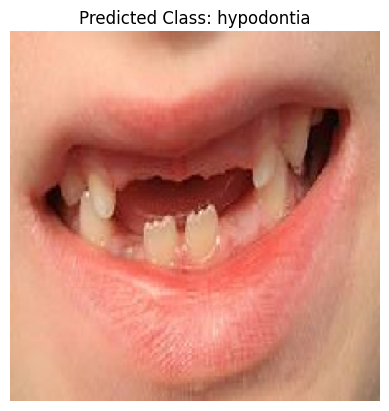

In [32]:
# Display the input image along with the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()